## Setup ##

In [18]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt

pd.set_option('precision', 2)

%matplotlib inline

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
1.16.4
0.25.0
0.9.0


## Import Race Data ##

In [19]:
df_2015 = pd.read_csv('Raw Data/2015.csv')
df_2015 = df_2015.rename(columns={'M/F': 'Gender', 'Official Time': 'Official', 'Gender': 'Genderdiv'})

df_2016 = pd.read_csv('Raw Data/2016.csv')
df_2016 = df_2016.rename(columns={'M/F': 'Gender', 'Official Time': 'Official', 'Gender': 'Genderdiv'})

df_2017 = pd.read_csv('Raw Data/2017.csv')
df_2017 = df_2017.rename(columns={'M/F': 'Gender', 'Official Time': 'Official', 'Gender': 'Genderdiv'})

In [20]:
def convert_Time(raw_time):
    """ This function converts input string of raw time in
        hh:mm:ss format to mm.mm float.
    """
    
    if raw_time == np.nan:
        return np.nan
    elif ':' not in raw_time:
        return np.nan
    else:
        hours, minutes, seconds = raw_time.split(':')
        return int(hours)*60 + int(minutes) + int(seconds)/60
    
df_2015.Pace = df_2015.Pace.apply(convert_Time)
df_2015.Official = df_2015.Official.apply(convert_Time)
df_2015['05K'] = df_2015['5K'].apply(convert_Time)
df_2015['10K'] = df_2015['10K'].apply(convert_Time)
df_2015['15K'] = df_2015['15K'].apply(convert_Time)
df_2015['20K'] = df_2015['20K'].apply(convert_Time)
df_2015['25K'] = df_2015['25K'].apply(convert_Time)
df_2015['30K'] = df_2015['30K'].apply(convert_Time)
df_2015['35K'] = df_2015['35K'].apply(convert_Time)
df_2015['40K'] = df_2015['40K'].apply(convert_Time)
    
df_2016.Pace = df_2016.Pace.apply(convert_Time)
df_2016.Official = df_2016.Official.apply(convert_Time)
df_2016['05K'] = df_2016['5K'].apply(convert_Time)
df_2016['10K'] = df_2016['10K'].apply(convert_Time)
df_2016['15K'] = df_2016['15K'].apply(convert_Time)
df_2016['20K'] = df_2016['20K'].apply(convert_Time)
df_2016['25K'] = df_2016['25K'].apply(convert_Time)
df_2016['30K'] = df_2016['30K'].apply(convert_Time)
df_2016['35K'] = df_2016['35K'].apply(convert_Time)
df_2016['40K'] = df_2016['40K'].apply(convert_Time)
    
df_2017.Pace = df_2017.Pace.apply(convert_Time)
df_2017.Official = df_2017.Official.apply(convert_Time)
df_2017['05K'] = df_2017['5K'].apply(convert_Time)
df_2017['10K'] = df_2017['10K'].apply(convert_Time)
df_2017['15K'] = df_2017['15K'].apply(convert_Time)
df_2017['20K'] = df_2017['20K'].apply(convert_Time)
df_2017['25K'] = df_2017['25K'].apply(convert_Time)
df_2017['30K'] = df_2017['30K'].apply(convert_Time)
df_2017['35K'] = df_2017['35K'].apply(convert_Time)
df_2017['40K'] = df_2017['40K'].apply(convert_Time)

## US Racer Data ##

In [21]:
ranges = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']

US_df_2015 = df_2015[df_2015.Country == 'USA']
US_df_2015.index = np.arange(len(US_df_2015))
US_df_2015['age_group'] = pd.cut(US_df_2015.Age, ranges, labels = labels).astype('category')

US_df_2016 = df_2016[df_2016.Country == 'USA']
US_df_2016.index = np.arange(len(US_df_2016))
US_df_2016['age_group'] = pd.cut(US_df_2016.Age, ranges, labels = labels).astype('category')

US_df_2017 = df_2017[df_2017.Country == 'USA']
US_df_2017.index = np.arange(len(US_df_2017))
US_df_2017['age_group'] = pd.cut(US_df_2017.Age, ranges, labels = labels).astype('category')

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [22]:
US_df_2015.groupby(['City']).sum().sort_values(by = 'Pace', ascending = False).reset_index()
US_df_2016.groupby(['City']).sum().sort_values(by = 'Pace', ascending = False).reset_index()
US_df_2017.groupby(['City']).sum().sort_values(by = 'Pace', ascending = False).reset_index()
pass

Cities with the most number of participants (from different states):
Boston
New York
Chicago
Austin
Washington
San Francisco
Seattle
San Diego
Portland
Houston
Atlanta
Minneapolis
Denver
Dallas

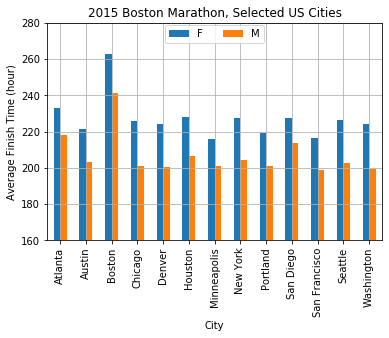

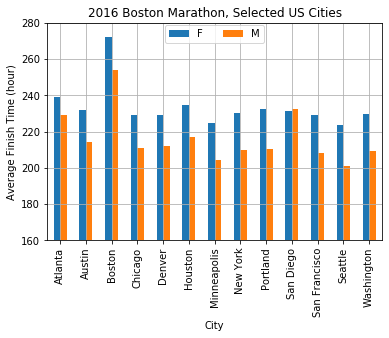

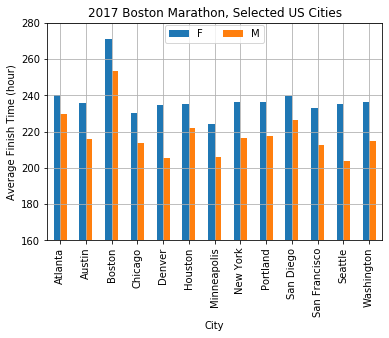

In [24]:
subset_city = ['Boston', 'New York', 'Chicago', 'Austin', 
               'Washington', 'San Francisco', 'Seattle', 'San Diego',
               'Portland', 'Houston', 'Atlanta', 'Minneapolis',
               'Denver']

subset = US_df_2015[(US_df_2015['City'].isin(subset_city))]
subset.groupby(['City', 'Gender'])['Official'].mean().unstack().plot.bar()
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
plt.xlabel('City')
plt.ylabel('Average Finish Time (hour)')
plt.title('2015 Boston Marathon, Selected US Cities')
plt.ylim((160,280))
plt.grid(True)


subset = US_df_2016[(US_df_2016['City'].isin(subset_city))]
subset.groupby(['City', 'Gender'])['Official'].mean().unstack().plot.bar()
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
plt.xlabel('City')
plt.ylabel('Average Finish Time (hour)')
plt.title('2016 Boston Marathon, Selected US Cities')
plt.ylim((160,280))
plt.grid(True)

subset = US_df_2017[(US_df_2017['City'].isin(subset_city))]
subset.groupby(['City', 'Gender'])['Official'].mean().unstack().plot.bar()
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
plt.xlabel('City')
plt.ylabel('Average Finish Time (hour)')
plt.title('2017 Boston Marathon, Selected US Cities')
plt.ylim((160,280))
plt.grid(True)

In [25]:
subset_male_2015 = US_df_2015[(US_df_2015['City'].isin(subset_city)) & (US_df_2015['Gender'] == 'M')]
subset_female_2015 = US_df_2015[(US_df_2015['City'].isin(subset_city)) & (US_df_2015['Gender'] == 'F')]

subset_male_2016 = US_df_2016[(US_df_2016['City'].isin(subset_city)) & (US_df_2016['Gender'] == 'M')]
subset_female_2016 = US_df_2016[(US_df_2016['City'].isin(subset_city)) & (US_df_2016['Gender'] == 'F')]

subset_male_2017 = US_df_2017[(US_df_2017['City'].isin(subset_city)) & (US_df_2017['Gender'] == 'M')]
subset_female_2017 = US_df_2017[(US_df_2017['City'].isin(subset_city)) & (US_df_2017['Gender'] == 'F')]

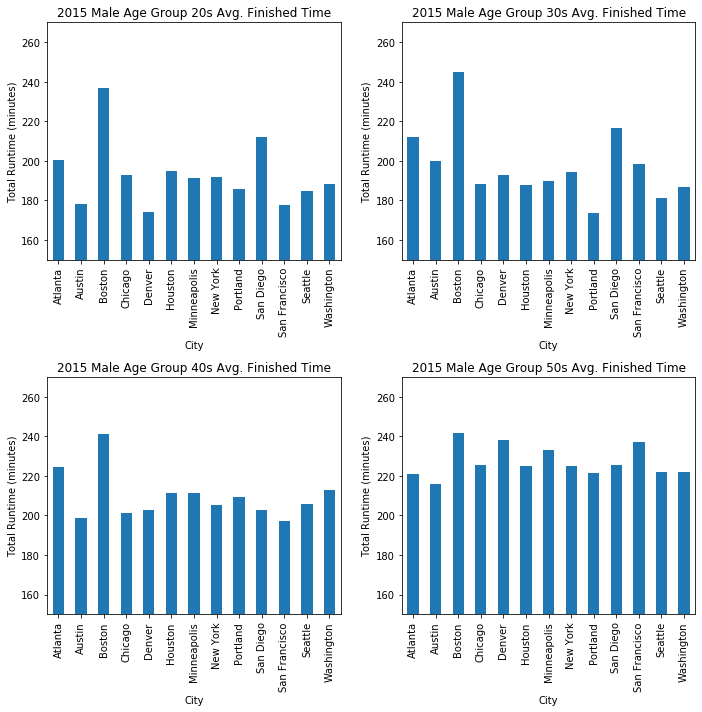

In [26]:
subset_male_2015_20s = subset_male_2015[subset_male_2015['age_group'] == '20s']
subset_male_2015_30s = subset_male_2015[subset_male_2015['age_group'] == '30s']
subset_male_2015_40s = subset_male_2015[subset_male_2015['age_group'] == '40s']
subset_male_2015_50s = subset_male_2015[subset_male_2015['age_group'] == '50s']

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
subset_male_2015_20s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2015 Male Age Group 20s Avg. Finished Time')

fig.add_subplot(2, 2, 2)
subset_male_2015_30s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2015 Male Age Group 30s Avg. Finished Time')

fig.add_subplot(2, 2, 3)
subset_male_2015_40s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2015 Male Age Group 40s Avg. Finished Time')

fig.add_subplot(2, 2, 4)
subset_male_2015_50s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2015 Male Age Group 50s Avg. Finished Time')

fig.tight_layout()


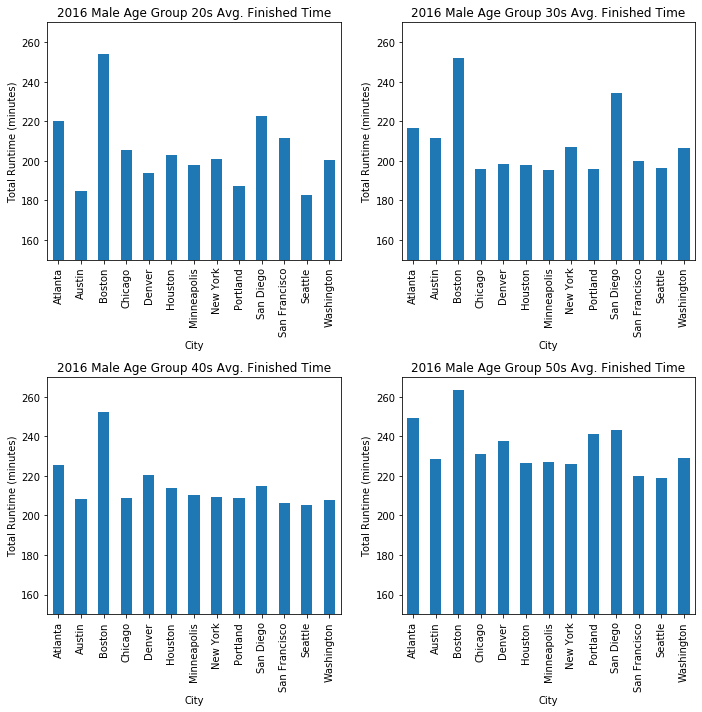

In [145]:
subset_male_2016_20s = subset_male_2016[subset_male_2016['age_group'] == '20s']
subset_male_2016_30s = subset_male_2016[subset_male_2016['age_group'] == '30s']
subset_male_2016_40s = subset_male_2016[subset_male_2016['age_group'] == '40s']
subset_male_2016_50s = subset_male_2016[subset_male_2016['age_group'] == '50s']

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
subset_male_2016_20s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2016 Male Age Group 20s Avg. Finished Time')

fig.add_subplot(2, 2, 2)
subset_male_2016_30s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2016 Male Age Group 30s Avg. Finished Time')

fig.add_subplot(2, 2, 3)
subset_male_2016_40s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2016 Male Age Group 40s Avg. Finished Time')

fig.add_subplot(2, 2, 4)
subset_male_2016_50s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2016 Male Age Group 50s Avg. Finished Time')

fig.tight_layout()


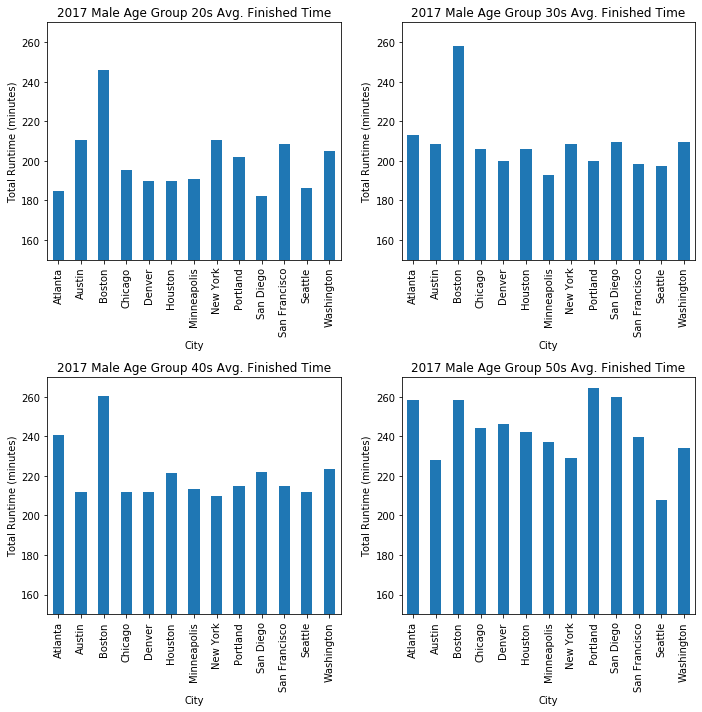

In [27]:
subset_male_2017_20s = subset_male_2017[subset_male_2017['age_group'] == '20s']
subset_male_2017_30s = subset_male_2017[subset_male_2017['age_group'] == '30s']
subset_male_2017_40s = subset_male_2017[subset_male_2017['age_group'] == '40s']
subset_male_2017_50s = subset_male_2017[subset_male_2017['age_group'] == '50s']

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
subset_male_2017_20s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Male Age Group 20s Avg. Finished Time')

fig.add_subplot(2, 2, 2)
subset_male_2017_30s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Male Age Group 30s Avg. Finished Time')

fig.add_subplot(2, 2, 3)
subset_male_2017_40s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Male Age Group 40s Avg. Finished Time')

fig.add_subplot(2, 2, 4)
subset_male_2017_50s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(150, 270)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Male Age Group 50s Avg. Finished Time')

fig.tight_layout()


In [12]:
city_df = pd.DataFrame({'City': ['Atlanta' , 'Austin', 'Boston', 'Chicago', 'Denver', 'Houston', 'Minneapolis',
                              'New York', 'Portland', 'San Diego', 'San Francisco', 'Seattle', 'Washington'], 
                       'Elevation': [1050, 489, 141, 594, 5280, 105, 830, 33, 50, 62, 52, 520, 410]})
city_df.set_index('City')

Elevation
City                    
Atlanta             1050
Austin               489
Boston               141
Chicago              594
Denver              5280
Houston              105
Minneapolis          830
New York              33
Portland              50
San Diego             62
San Francisco         52
Seattle              520
Washington           410

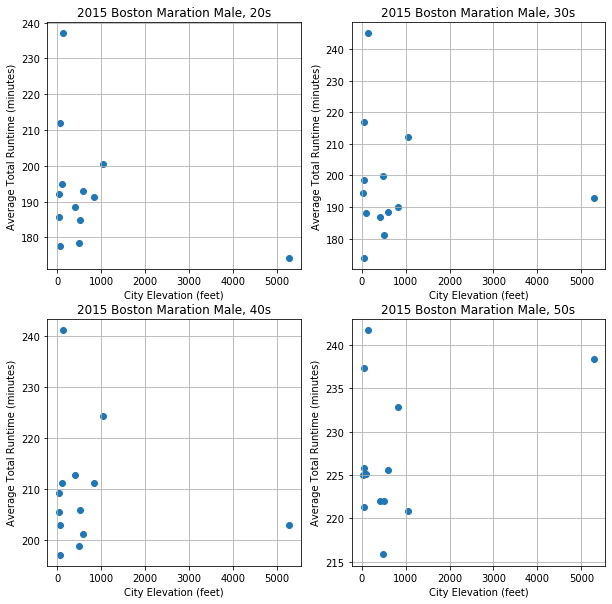

In [28]:
city_altitude = pd.Series(data = [1050, 489, 141, 594, 5280, 105, 830, 33, 50, 62, 52, 520, 410], name='Elevation')

male_2015_20s_avg_official = subset_male_2015_20s.groupby('City').Official.mean()
male_2015_30s_avg_official = subset_male_2015_30s.groupby('City').Official.mean()
male_2015_40s_avg_official = subset_male_2015_40s.groupby('City').Official.mean()
male_2015_50s_avg_official = subset_male_2015_50s.groupby('City').Official.mean()

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
plt.scatter(city_altitude, male_2015_20s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2015 Boston Maration Male, 20s')
plt.grid(True)

fig.add_subplot(2, 2, 2)
plt.scatter(city_altitude, male_2015_30s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2015 Boston Maration Male, 30s')
plt.grid(True)

fig.add_subplot(2, 2, 3)
plt.scatter(city_altitude, male_2015_40s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2015 Boston Maration Male, 40s')
plt.grid(True)

fig.add_subplot(2, 2, 4)
plt.scatter(city_altitude, male_2015_50s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2015 Boston Maration Male, 50s')
plt.grid(True)

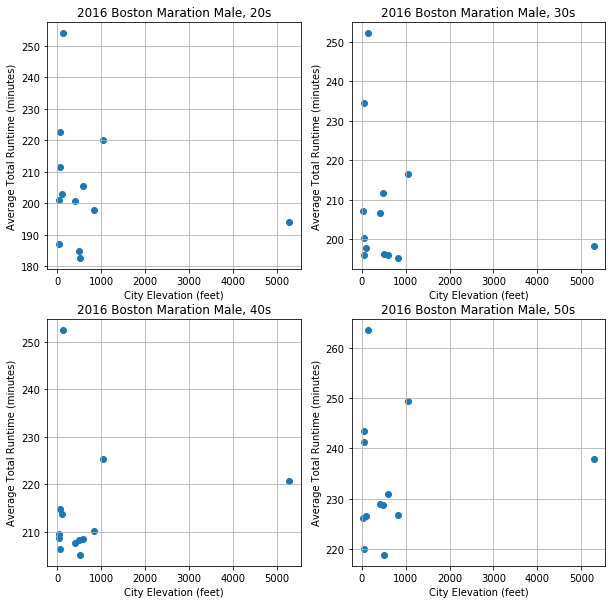

In [148]:
city_altitude = pd.Series(data = [1050, 489, 141, 594, 5280, 105, 830, 33, 50, 62, 52, 520, 410], name='Elevation')

male_2016_20s_avg_official = subset_male_2016_20s.groupby('City').Official.mean()
male_2016_30s_avg_official = subset_male_2016_30s.groupby('City').Official.mean()
male_2016_40s_avg_official = subset_male_2016_40s.groupby('City').Official.mean()
male_2016_50s_avg_official = subset_male_2016_50s.groupby('City').Official.mean()

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
plt.scatter(city_altitude, male_2016_20s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2016 Boston Maration Male, 20s')
plt.grid(True)

fig.add_subplot(2, 2, 2)
plt.scatter(city_altitude, male_2016_30s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2016 Boston Maration Male, 30s')
plt.grid(True)

fig.add_subplot(2, 2, 3)
plt.scatter(city_altitude, male_2016_40s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2016 Boston Maration Male, 40s')
plt.grid(True)

fig.add_subplot(2, 2, 4)
plt.scatter(city_altitude, male_2016_50s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2016 Boston Maration Male, 50s')
plt.grid(True)

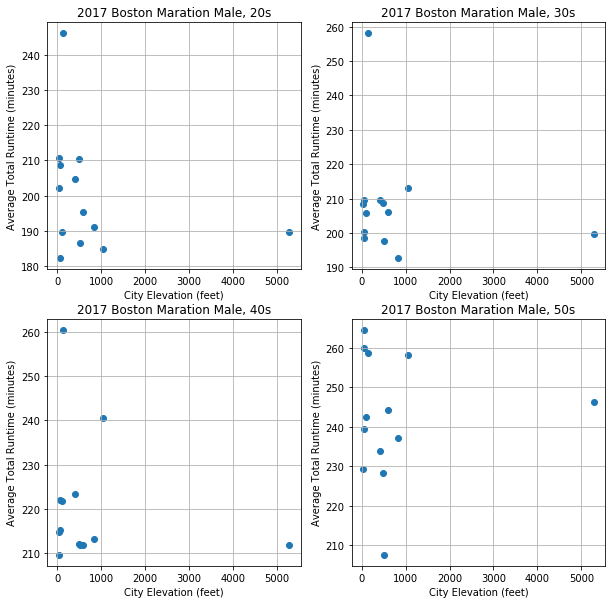

In [29]:
city_altitude = pd.Series(data = [1050, 489, 141, 594, 5280, 105, 830, 33, 50, 62, 52, 520, 410], name='Elevation')

male_2017_20s_avg_official = subset_male_2017_20s.groupby('City').Official.mean()
male_2017_30s_avg_official = subset_male_2017_30s.groupby('City').Official.mean()
male_2017_40s_avg_official = subset_male_2017_40s.groupby('City').Official.mean()
male_2017_50s_avg_official = subset_male_2017_50s.groupby('City').Official.mean()

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
plt.scatter(city_altitude, male_2017_20s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Male, 20s')
plt.grid(True)

fig.add_subplot(2, 2, 2)
plt.scatter(city_altitude, male_2017_30s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Male, 30s')
plt.grid(True)

fig.add_subplot(2, 2, 3)
plt.scatter(city_altitude, male_2017_40s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Male, 40s')
plt.grid(True)

fig.add_subplot(2, 2, 4)
plt.scatter(city_altitude, male_2017_50s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Male, 50s')
plt.grid(True)

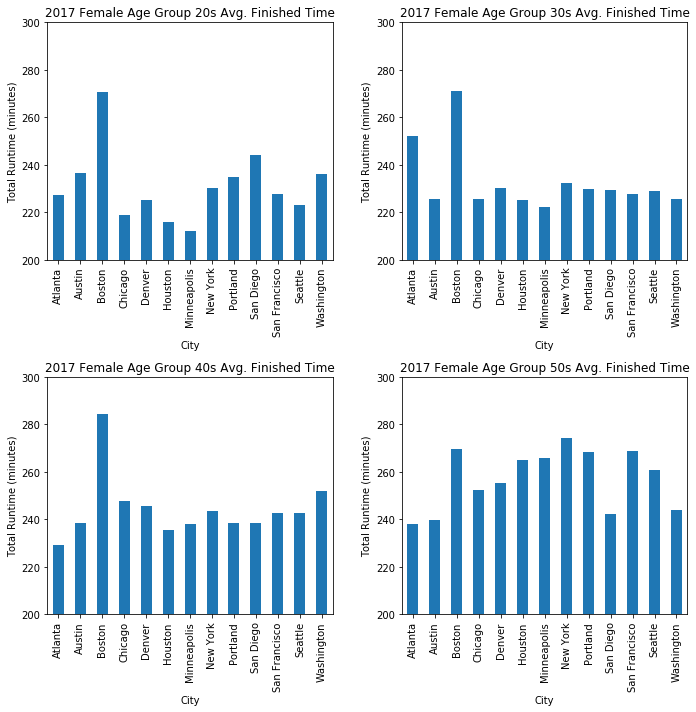

In [31]:
subset_female_2017_20s = subset_female_2017[subset_female_2017['age_group'] == '20s']
subset_female_2017_30s = subset_female_2017[subset_female_2017['age_group'] == '30s']
subset_female_2017_40s = subset_female_2017[subset_female_2017['age_group'] == '40s']
subset_female_2017_50s = subset_female_2017[subset_female_2017['age_group'] == '50s']

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
subset_female_2017_20s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(200, 300)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Female Age Group 20s Avg. Finished Time')

fig.add_subplot(2, 2, 2)
subset_female_2017_30s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(200, 300)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Female Age Group 30s Avg. Finished Time')

fig.add_subplot(2, 2, 3)
subset_female_2017_40s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(200, 300)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Female Age Group 40s Avg. Finished Time')

fig.add_subplot(2, 2, 4)
subset_female_2017_50s.groupby('City').Official.mean().plot(kind='bar')
plt.ylim(200, 300)
plt.ylabel('Total Runtime (minutes)')
plt.title('2017 Female Age Group 50s Avg. Finished Time')

fig.tight_layout()


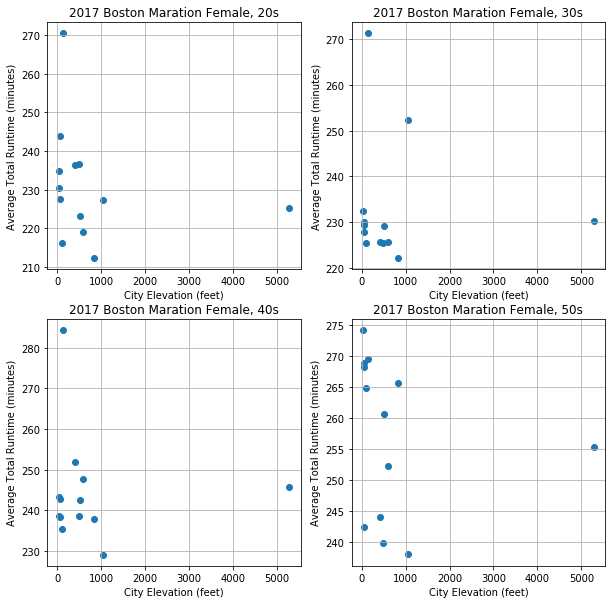

In [32]:
city_altitude = pd.Series(data = [1050, 489, 141, 594, 5280, 105, 830, 33, 50, 62, 52, 520, 410], name='Elevation')

female_2017_20s_avg_official = subset_female_2017_20s.groupby('City').Official.mean()
female_2017_30s_avg_official = subset_female_2017_30s.groupby('City').Official.mean()
female_2017_40s_avg_official = subset_female_2017_40s.groupby('City').Official.mean()
female_2017_50s_avg_official = subset_female_2017_50s.groupby('City').Official.mean()

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
plt.scatter(city_altitude, female_2017_20s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Female, 20s')
plt.grid(True)

fig.add_subplot(2, 2, 2)
plt.scatter(city_altitude, female_2017_30s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Female, 30s')
plt.grid(True)

fig.add_subplot(2, 2, 3)
plt.scatter(city_altitude, female_2017_40s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Female, 40s')
plt.grid(True)

fig.add_subplot(2, 2, 4)
plt.scatter(city_altitude, female_2017_50s_avg_official)
plt.xlabel('City Elevation (feet)')
plt.ylabel('Average Total Runtime (minutes)')
plt.title('2017 Boston Maration Female, 50s')
plt.grid(True)

## Route Elevation Analysis ##

In [33]:
df_route = pd.read_csv('Raw Data/route_5644920.csv')
new_df_route = df_route[0::2]
new_df_route.index = np.arange(len(new_df_route))
new_df_route.head()

Distance from start(meters)  elevation(meters)  accumulated ascent(meters)  \
0                         0.00             145.25                        0.00   
1                       340.81             146.18                        0.00   
2                       649.18             146.18                        0.93   
3                      1016.17             129.55                        0.93   
4                      1504.01             105.48                        0.93   

   accumulated descent(meters)  
0                         0.00  
1                         0.00  
2                         0.00  
3                         0.00  
4                       -16.63

In [34]:
new_df_route.columns

Index(['Distance from start(meters)', 'elevation(meters)',
       'accumulated ascent(meters)', 'accumulated descent(meters)'],
      dtype='object')

In [45]:
top_10_2015 = df_2015[0:10]
top_10_2015['Pace_05K'] = top_10_2015['05K']/5
top_10_2015['Pace_10K'] = (top_10_2015['10K']-top_10_2015['05K'])/5
top_10_2015['Pace_15K'] = (top_10_2015['15K']-top_10_2015['10K'])/5
top_10_2015['Pace_20K'] = (top_10_2015['20K']-top_10_2015['15K'])/5
top_10_2015['Pace_25K'] = (top_10_2015['25K']-top_10_2015['20K'])/5
top_10_2015['Pace_30K'] = (top_10_2015['30K']-top_10_2015['25K'])/5
top_10_2015['Pace_35K'] = (top_10_2015['35K']-top_10_2015['30K'])/5
top_10_2015['Pace_40K'] = (top_10_2015['40K']-top_10_2015['35K'])/5

top_10_2016 = df_2016[0:10]
top_10_2016['Pace_05K'] = top_10_2016['05K']/5
top_10_2016['Pace_10K'] = (top_10_2016['10K']-top_10_2016['05K'])/5
top_10_2016['Pace_15K'] = (top_10_2016['15K']-top_10_2016['10K'])/5
top_10_2016['Pace_20K'] = (top_10_2016['20K']-top_10_2016['15K'])/5
top_10_2016['Pace_25K'] = (top_10_2016['25K']-top_10_2016['20K'])/5
top_10_2016['Pace_30K'] = (top_10_2016['30K']-top_10_2016['25K'])/5
top_10_2016['Pace_35K'] = (top_10_2016['35K']-top_10_2016['30K'])/5
top_10_2016['Pace_40K'] = (top_10_2016['40K']-top_10_2016['35K'])/5

top_10_2017 = df_2017[0:10]
top_10_2017['Pace_05K'] = top_10_2017['05K']/5
top_10_2017['Pace_10K'] = (top_10_2017['10K']-top_10_2017['05K'])/5
top_10_2017['Pace_15K'] = (top_10_2017['15K']-top_10_2017['10K'])/5
top_10_2017['Pace_20K'] = (top_10_2017['20K']-top_10_2017['15K'])/5
top_10_2017['Pace_25K'] = (top_10_2017['25K']-top_10_2017['20K'])/5
top_10_2017['Pace_30K'] = (top_10_2017['30K']-top_10_2017['25K'])/5
top_10_2017['Pace_35K'] = (top_10_2017['35K']-top_10_2017['30K'])/5
top_10_2017['Pace_40K'] = (top_10_2017['40K']-top_10_2017['35K'])/5

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

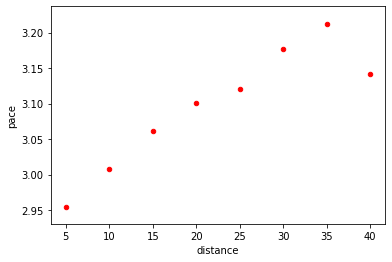

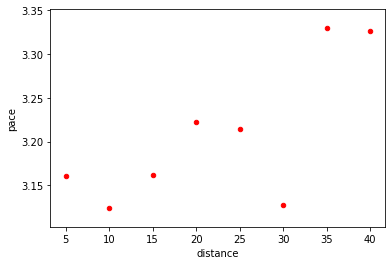

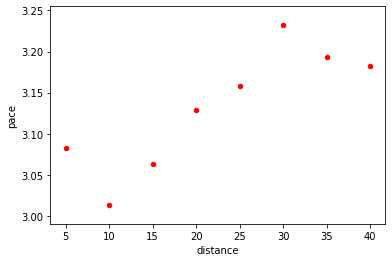

In [85]:
top_10_pace = top_10_2015.mean()[16:24]
avg_top_10_pace_2015 = pd.DataFrame(data = top_10_pace, columns={'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_top_10_pace_2015['distance'] = distance
avg_top_10_pace_2015.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

top_10_pace = top_10_2016.mean()[16:24]
avg_top_10_pace_2016 = pd.DataFrame(data = top_10_pace, columns={'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_top_10_pace_2016['distance'] = distance
avg_top_10_pace_2016.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

top_10_pace = top_10_2017.mean()[16:24]
avg_top_10_pace_2017 = pd.DataFrame(data = top_10_pace, columns={'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_top_10_pace_2017['distance'] = distance
avg_top_10_pace_2017.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Text(0.5, 1.0, 'Top 10 Runner Pace, 2017')

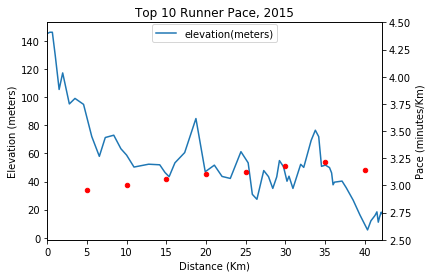

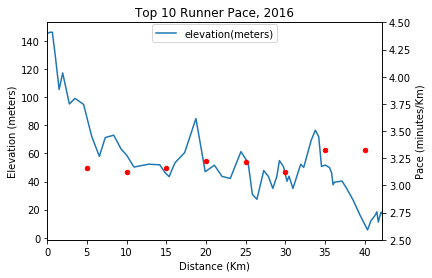

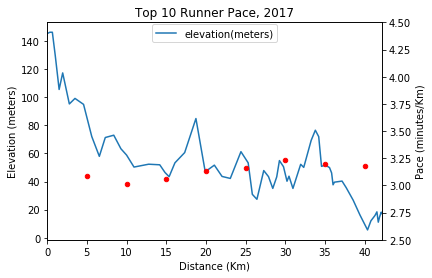

In [99]:
new_df_route['Dist_in_Km'] = new_df_route['Distance from start(meters)'] / 1000
ax1 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0)
ax2 = ax1.twinx()
avg_top_10_pace_2015.plot.scatter(x='distance', y='pace', c='Red', ax = ax2)
plt.ylim(2.5, 4.5)
plt.ylabel('Pace (minutes/Km)')
plt.title('Top 10 Runner Pace, 2015')

new_df_route['Dist_in_Km'] = new_df_route['Distance from start(meters)'] / 1000
ax3 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0)
ax4 = ax3.twinx()
avg_top_10_pace_2016.plot.scatter(x='distance', y='pace', c='Red', ax = ax4)
plt.ylim(2.5, 4.5)
plt.ylabel('Pace (minutes/Km)')
plt.title('Top 10 Runner Pace, 2016')

new_df_route['Dist_in_Km'] = new_df_route['Distance from start(meters)'] / 1000
ax5 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0)
ax6 = ax5.twinx()
avg_top_10_pace_2017.plot.scatter(x='distance', y='pace', c='Red', ax = ax6)
plt.ylim(2.5, 4.5)
plt.ylabel('Pace (minutes/Km)')
plt.title('Top 10 Runner Pace, 2017')

In [63]:
mu_2015 = df_2015['Official'].describe()[1]
sigma_2015 = df_2015['Official'].describe()[2]

mu_2016 = df_2016['Official'].describe()[1]
sigma_2016 = df_2016['Official'].describe()[2]

mu_2017 = df_2017['Official'].describe()[1]
sigma_2017 = df_2017['Official'].describe()[2]

In [64]:
middle_2015 = df_2015[(df_2015['Official'] > (mu_2015 - 0.25*sigma_2015)) & 
                      (df_2015['Official'] < (mu_2015 + 0.25*sigma_2015))]
middle_2015['Pace_05K'] = middle_2015['05K']/5
middle_2015['Pace_10K'] = (middle_2015['10K']-middle_2015['05K'])/5
middle_2015['Pace_15K'] = (middle_2015['15K']-middle_2015['10K'])/5
middle_2015['Pace_20K'] = (middle_2015['20K']-middle_2015['15K'])/5
middle_2015['Pace_25K'] = (middle_2015['25K']-middle_2015['20K'])/5
middle_2015['Pace_30K'] = (middle_2015['30K']-middle_2015['25K'])/5
middle_2015['Pace_35K'] = (middle_2015['35K']-middle_2015['30K'])/5
middle_2015['Pace_40K'] = (middle_2015['40K']-middle_2015['35K'])/5

middle_2016 = df_2016[(df_2016['Official'] > (mu_2016 - 0.25*sigma_2016)) & 
                      (df_2016['Official'] < (mu_2016 + 0.25*sigma_2016))]
middle_2016['Pace_05K'] = middle_2016['05K']/5
middle_2016['Pace_10K'] = (middle_2016['10K']-middle_2016['05K'])/5
middle_2016['Pace_15K'] = (middle_2016['15K']-middle_2016['10K'])/5
middle_2016['Pace_20K'] = (middle_2016['20K']-middle_2016['15K'])/5
middle_2016['Pace_25K'] = (middle_2016['25K']-middle_2016['20K'])/5
middle_2016['Pace_30K'] = (middle_2016['30K']-middle_2016['25K'])/5
middle_2016['Pace_35K'] = (middle_2016['35K']-middle_2016['30K'])/5
middle_2016['Pace_40K'] = (middle_2016['40K']-middle_2016['35K'])/5

middle_2017 = df_2017[(df_2017['Official'] > (mu_2017 - 0.25*sigma_2017)) & 
                      (df_2017['Official'] < (mu_2017 + 0.25*sigma_2017))]
middle_2017['Pace_05K'] = middle_2017['05K']/5
middle_2017['Pace_10K'] = (middle_2017['10K']-middle_2017['05K'])/5
middle_2017['Pace_15K'] = (middle_2017['15K']-middle_2017['10K'])/5
middle_2017['Pace_20K'] = (middle_2017['20K']-middle_2017['15K'])/5
middle_2017['Pace_25K'] = (middle_2017['25K']-middle_2017['20K'])/5
middle_2017['Pace_30K'] = (middle_2017['30K']-middle_2017['25K'])/5
middle_2017['Pace_35K'] = (middle_2017['35K']-middle_2017['30K'])/5
middle_2017['Pace_40K'] = (middle_2017['40K']-middle_2017['35K'])/5

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

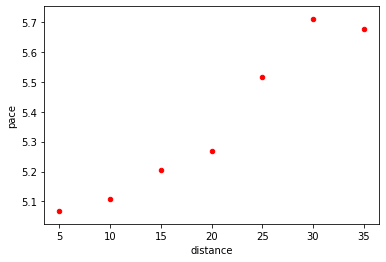

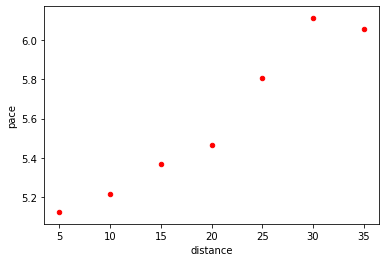

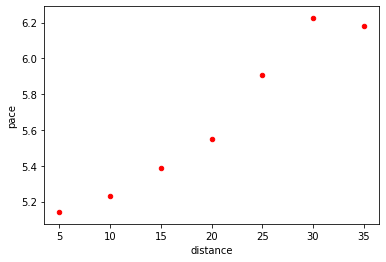

In [89]:
middle_pace = middle_2015.mean()[16:24]
avg_middle_pace_2015 = pd.DataFrame(data = middle_pace, columns = {'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_middle_pace_2015['distance'] = distance
avg_middle_pace_2015.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

middle_pace = middle_2016.mean()[16:24]
avg_middle_pace_2016 = pd.DataFrame(data = middle_pace, columns = {'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_middle_pace_2016['distance'] = distance
avg_middle_pace_2016.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

middle_pace = middle_2017.mean()[16:24]
avg_middle_pace_2017 = pd.DataFrame(data = middle_pace, columns = {'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_middle_pace_2017['distance'] = distance
avg_middle_pace_2017.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average Runner Pace ($\\mu$ $\\pm$ $\\sigma$/4), 2017')

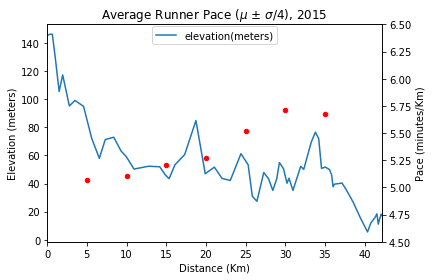

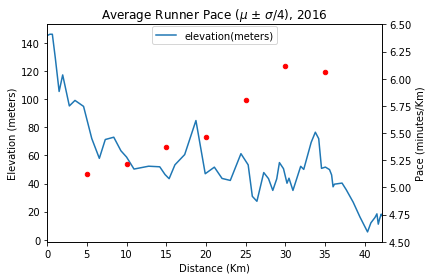

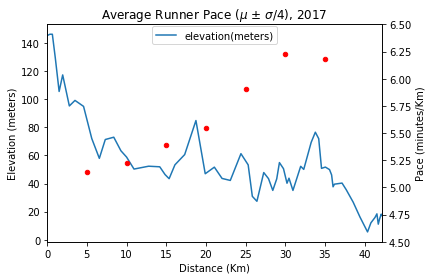

In [102]:
new_df_route['Dist_in_Km'] = new_df_route['Distance from start(meters)'] / 1000
ax7 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
ax8 = ax7.twinx()
avg_middle_pace_2015.plot.scatter(x = 'distance', y = 'pace', c = 'Red', ax = ax8)
plt.ylim(4.5, 6.5)
plt.ylabel('Pace (minutes/Km)')
plt.title(r'Average Runner Pace ($\mu$ $\pm$ $\sigma$/4), 2015')

ax9 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
ax10 = ax9.twinx()
avg_middle_pace_2016.plot.scatter(x = 'distance', y = 'pace', c = 'Red', ax = ax10)
plt.ylim(4.5, 6.5)
plt.ylabel('Pace (minutes/Km)')
plt.title(r'Average Runner Pace ($\mu$ $\pm$ $\sigma$/4), 2016')

ax11 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
ax12 = ax11.twinx()
avg_middle_pace_2017.plot.scatter(x = 'distance', y = 'pace', c = 'Red', ax = ax12)
plt.ylim(4.5, 6.5)
plt.ylabel('Pace (minutes/Km)')
plt.title(r'Average Runner Pace ($\mu$ $\pm$ $\sigma$/4), 2017')

In [95]:
slow_2015 = df_2015[(df_2015['Official'] > (mu_2015 + sigma_2015 - 0.25*sigma_2015)) & 
                    (df_2015['Official'] < (mu_2015 + sigma_2015 + 0.25*sigma_2015))]

slow_2015['Pace_05K'] = slow_2015['05K']/5
slow_2015['Pace_10K'] = (slow_2015['10K']-slow_2015['05K'])/5
slow_2015['Pace_15K'] = (slow_2015['15K']-slow_2015['10K'])/5
slow_2015['Pace_20K'] = (slow_2015['20K']-slow_2015['15K'])/5
slow_2015['Pace_25K'] = (slow_2015['25K']-slow_2015['20K'])/5
slow_2015['Pace_30K'] = (slow_2015['30K']-slow_2015['25K'])/5
slow_2015['Pace_35K'] = (slow_2015['35K']-slow_2015['30K'])/5
slow_2015['Pace_40K'] = (slow_2015['40K']-slow_2015['35K'])/5

slow_2016 = df_2016[(df_2016['Official'] > (mu_2016 + sigma_2016 - 0.25*sigma_2016)) & 
                    (df_2016['Official'] < (mu_2016 + sigma_2016 + 0.25*sigma_2016))]

slow_2016['Pace_05K'] = slow_2016['05K']/5
slow_2016['Pace_10K'] = (slow_2016['10K']-slow_2016['05K'])/5
slow_2016['Pace_15K'] = (slow_2016['15K']-slow_2016['10K'])/5
slow_2016['Pace_20K'] = (slow_2016['20K']-slow_2016['15K'])/5
slow_2016['Pace_25K'] = (slow_2016['25K']-slow_2016['20K'])/5
slow_2016['Pace_30K'] = (slow_2016['30K']-slow_2016['25K'])/5
slow_2016['Pace_35K'] = (slow_2016['35K']-slow_2016['30K'])/5
slow_2016['Pace_40K'] = (slow_2016['40K']-slow_2016['35K'])/5

slow_2017 = df_2017[(df_2017['Official'] > (mu_2017 + sigma_2017 - 0.25*sigma_2017)) & 
                    (df_2017['Official'] < (mu_2017 + sigma_2017 + 0.25*sigma_2017))]

slow_2017['Pace_05K'] = slow_2017['05K']/5
slow_2017['Pace_10K'] = (slow_2017['10K']-slow_2017['05K'])/5
slow_2017['Pace_15K'] = (slow_2017['15K']-slow_2017['10K'])/5
slow_2017['Pace_20K'] = (slow_2017['20K']-slow_2017['15K'])/5
slow_2017['Pace_25K'] = (slow_2017['25K']-slow_2017['20K'])/5
slow_2017['Pace_30K'] = (slow_2017['30K']-slow_2017['25K'])/5
slow_2017['Pace_35K'] = (slow_2017['35K']-slow_2017['30K'])/5
slow_2017['Pace_40K'] = (slow_2017['40K']-slow_2017['35K'])/5

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

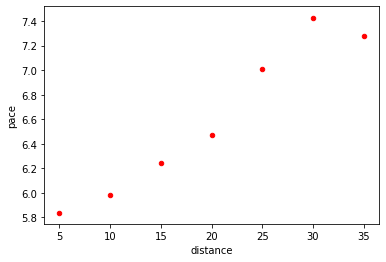

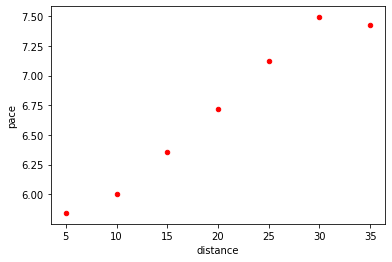

In [96]:
slow_pace = slow_2015.mean()[16:24]
avg_slow_pace_2015 = pd.DataFrame(data = slow_pace, columns = {'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_slow_pace_2015['distance'] = distance
avg_slow_pace_2015.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

slow_pace = slow_2016.mean()[16:24]
avg_slow_pace_2016 = pd.DataFrame(data = slow_pace, columns = {'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_slow_pace_2016['distance'] = distance
avg_slow_pace_2016.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

slow_pace = slow_2017.mean()[16:24]
avg_slow_pace_2017 = pd.DataFrame(data = slow_pace, columns = {'pace'}).reset_index()
distance = pd.Series([5, 10 , 15, 20, 25, 30, 35, 40])
avg_slow_pace_2017['distance'] = distance
avg_slow_pace_2017.plot.scatter(x = 'distance', y = 'pace', c = 'Red')

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average Runner Pace [$\\mu$ $\\pm$ $\\sigma$/4] + $\\sigma$, 2017')

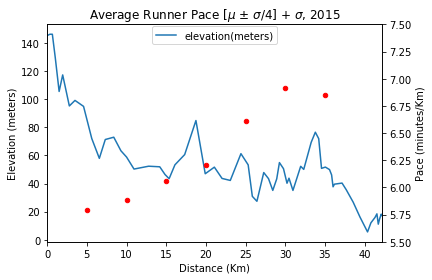

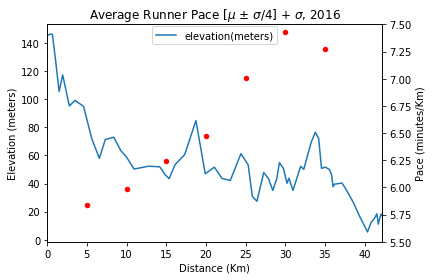

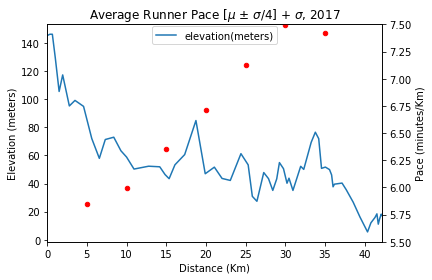

In [101]:
new_df_route['Dist_in_Km'] = new_df_route['Distance from start(meters)'] / 1000
ax13 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
ax14 = ax13.twinx()
avg_slow_pace_2015.plot.scatter(x = 'distance', y = 'pace', c = 'Red', ax = ax14)
plt.ylim(5.5, 7.5)
plt.ylabel('Pace (minutes/Km)')
plt.title(r'Average Runner Pace [$\mu$ $\pm$ $\sigma$/4] + $\sigma$, 2015')


ax15 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
ax16 = ax15.twinx()
avg_slow_pace_2016.plot.scatter(x = 'distance', y = 'pace', c = 'Red', ax = ax16)
plt.ylim(5.5, 7.5)
plt.ylabel('Pace (minutes/Km)')
plt.title(r'Average Runner Pace [$\mu$ $\pm$ $\sigma$/4] + $\sigma$, 2016')


ax17 = new_df_route.plot(x = 'Dist_in_Km', y = 'elevation(meters)')
plt.ylabel('Elevation (meters)')
plt.xlabel('Distance (Km)')
plt.legend(bbox_to_anchor=[0.5, 0.95], loc='center',
           ncol=2, borderaxespad=0.)
ax18 = ax17.twinx()
avg_slow_pace_2017.plot.scatter(x = 'distance', y = 'pace', c = 'Red', ax = ax18)
plt.ylim(5.5, 7.5)
plt.ylabel('Pace (minutes/Km)')
plt.title(r'Average Runner Pace [$\mu$ $\pm$ $\sigma$/4] + $\sigma$, 2017')